# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
#importing required modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud , STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline

## Scraping

In [3]:
#Passing base url
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 200

#Creating reviews list to store reviews
reviews = []

#Creating df to later concat the lists
df = pd.DataFrame()

#For loop to scrap pages one by one.
for i in range(1, pages + 1):
    
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    # Parse the stats from the tables using for loop.    
    for stats in parsed_content.find_all("div", {"class" : "review-stats"}):
        #Creating rating and catagory to store names of categories and rating for each iteration.
        rating = []
        category = []
        #for storing ratings of non-star values while keeping recommendations(last index) separate 
        for rate in stats.find_all('td',{'class' : 'review-value'}):
            rating.append(rate.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        #collecting stars info 
        for star in stats.find_all('td',{'class' : 'review-rating-stars stars'}):
            stars = len(star.find_all('span', {'class' : 'star fill'}))
            rating.append(stars)
        rating.append(recomend)
        #collecting names of categories 
        for header in stats.find_all('td',{'class' : 'review-rating-header'}):
            category.append(header.get_text())
        #concating each row in dataframe and assigning categories as column names
        data_dict = pd.DataFrame([rating], columns=category)
        df = pd.concat([df, pd.DataFrame(data_dict)], ignore_index=True).reset_index(drop=True)
        
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 200 total reviews
Scraping page 2
   ---> 400 total reviews
Scraping page 3
   ---> 600 total reviews
Scraping page 4
   ---> 800 total reviews
Scraping page 5
   ---> 1000 total reviews
Scraping page 6
   ---> 1200 total reviews
Scraping page 7
   ---> 1400 total reviews
Scraping page 8
   ---> 1600 total reviews
Scraping page 9
   ---> 1800 total reviews
Scraping page 10
   ---> 2000 total reviews
Scraping page 11
   ---> 2200 total reviews
Scraping page 12
   ---> 2400 total reviews
Scraping page 13
   ---> 2600 total reviews
Scraping page 14
   ---> 2800 total reviews
Scraping page 15
   ---> 3000 total reviews
Scraping page 16
   ---> 3200 total reviews
Scraping page 17
   ---> 3400 total reviews
Scraping page 18
   ---> 3600 total reviews
Scraping page 19
   ---> 3754 total reviews
Scraping page 20
   ---> 3754 total reviews


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning

### Removing "✅ Trip Verified |" & "Not Verified"

In [ ]:
# To apply the string functions on a df col. you hae to use .str
df['reviews']= df['reviews'].str.replace('✅ Trip Verified |','')
df['reviews']= df['reviews'].str.replace('✅ Verified Review |','')
df['reviews']= df['reviews'].str.replace('❎ Unverified |','')
df['reviews']= df['reviews'].str.replace('Not Verified |','')
df.sample()

### Dealing with the Null Values

In [6]:
#Filling Numeric Nulls with means. First selecting columns that whose dtypes include number
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
float_columns = df.select_dtypes(include=['float64']).columns
#applying lambda function to change dtype from float to int64. 
df[float_columns] = df[float_columns].apply(lambda x: round(x).astype('Int64', errors='ignore'))
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Value For Money,Recommended,Aircraft,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,reviews
0,Couple Leisure,Economy Class,Pisa to London Heathrow,September 2023,1,no,NaN,3,3,3,3,3,2,That was supposed to be my flight but it was...
1,Couple Leisure,Business Class,Malaga to London Heathrow,February 2024,4,yes,A320,5,5,5,4,3,2,Have no fear when your BA flight is operated...
2,Couple Leisure,Economy Class,Phoenix to Lisbon via London,February 2024,1,no,A350,1,5,3,1,3,1,We have flown BA five times from western USA...
3,Solo Leisure,Economy Class,London to Istanbul,February 2024,2,no,A320,3,1,1,2,3,2,London Heathrow to Istanbul at the start of ...
4,Solo Leisure,Premium Economy,"Austin, TX to Shannon, Ireland via Austin",January 2024,2,no,Boeing 777,3,5,3,4,3,2,"Jan 30th, I booked a last-minute, transatlant..."


In [54]:
#Dropping Rows with non numeric Nulls
df=df.dropna().reset_index(drop=True) 
df.tail()

,Seat Type,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,reviews,Score
1939,Business Class,2015-05-01,1,no,1,3,2,3,1,1,Terrible. Flight time is well over 2 hours. Se...,1.714286
1940,Economy Class,2015-05-01,4,yes,3,5,4,3,2,2,"28th May 2015, LHR-DEN, B747, Seat 29A. Paid ...",3.285714
1941,Business Class,2015-06-01,5,yes,4,5,2,3,4,2,"9/6/15, ORD-LHR, 777-300, Club World, Seat 13b...",3.571429
1942,Economy Class,2015-06-01,4,yes,4,5,3,3,3,2,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to ...",3.428571
1943,Economy Class,2015-05-01,4,yes,4,5,4,3,3,2,"28 May 2015, GLA-LHR. A321 (new Seating) Seat ...",3.571429


In [44]:
#Data type adjustments
df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y' )
df.sample()

,Type Of Traveller,Seat Type,Route,Date Flown,Value For Money,Recommended,Aircraft,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,reviews,Score
1879,Business,Business Class,London Heathrow to Tokyo,2015-07-01,4,no,Boeing 777,1,2,4,3,4,2,I am a very frequent long haul traveller and a...,2.857143


In [46]:
#Getting rid of unneccessory data
df=df.drop(columns=['Type Of Traveller','Route','Aircraft'])
df.sample()

,Seat Type,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,reviews,Score
1921,Economy Class,2015-06-01,1,no,1,3,2,1,3,2,Check in at Tegel was a disaster and ludicrous...,1.857143


In [9]:
#using numeric columns to take their mean value from all and make a new col of overall score avrg
numCol=df.select_dtypes(include=["number"])
satisfactionScore = numCol.mean(axis=1)
df['Score'] = satisfactionScore
df.sample()

,Seat Type,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,reviews,Score,polarity,sentiment
1039,Business Class,2017-04-01,3,no,2,5,1,5,3,2,Gatwick to Pisa. Check in at Gatwick a breez...,2.671631,0.044679,positive


In [47]:
df.to_csv("data/BA_reviews.csv")

## Basic Data visualization 

### Correlation matrix of Satisfaction Rating

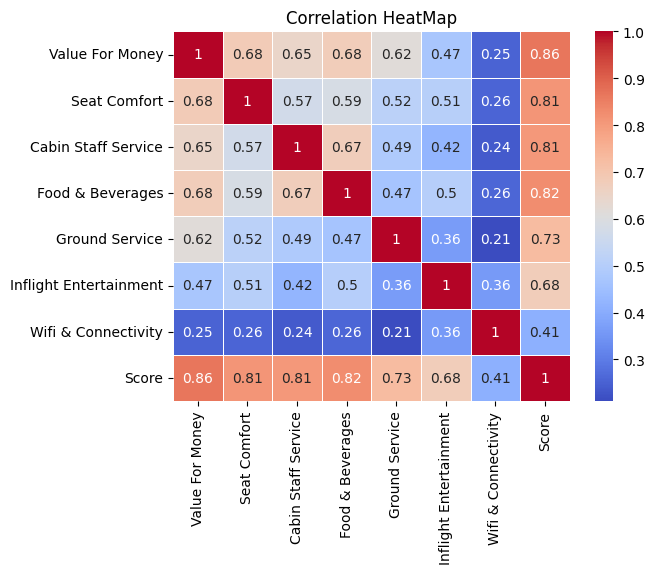

In [48]:
#creating corr object for plot 
correlationMatrix= numCol.corr()

#initiating plot using plt.figure
plt.figure()
#using seaborns heatmap
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.title('Correlation HeatMap')
plt.show()

### Pie chart of recommendation 

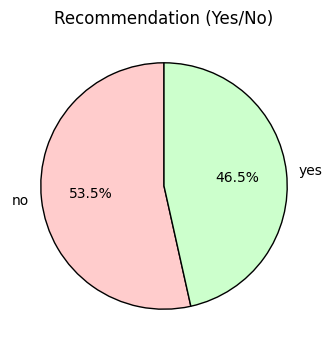

In [49]:
#df[col].value_counts returns a series of count of distinct values
response_counts = df['Recommended'].value_counts()
#initiating figure with  size argument
plt.figure(figsize=(4,4))
#Pie chart with arguements counts and label are index of r_c series. autopct %1.1f% to round result
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFCCCC', '#CCFFCC'],  wedgeprops=dict(edgecolor='black'))
plt.title('Recommendation (Yes/No)')
plt.show()

### Satisfaction score over time


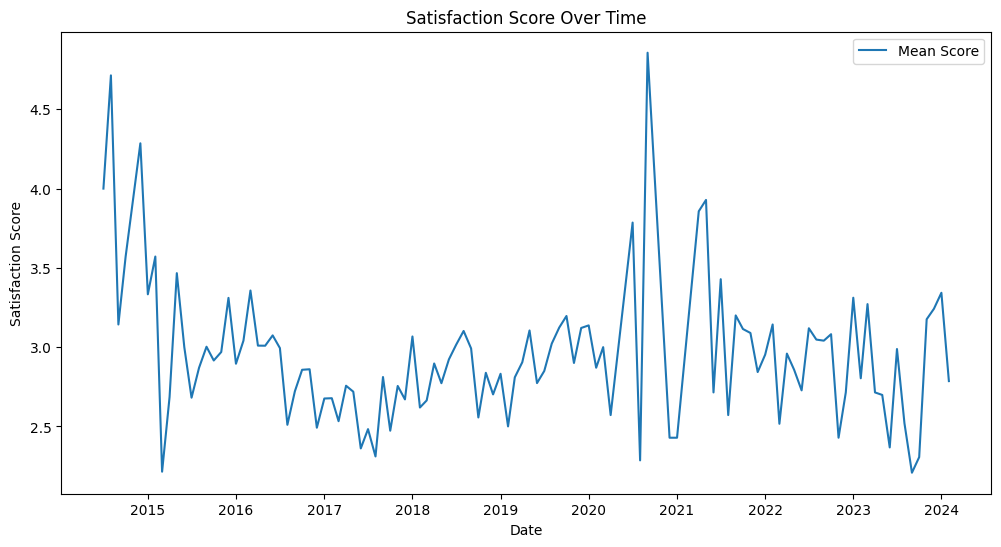

In [52]:
#Grouping score by the date then taking mean for each date
dateScore = df.groupby('Date Flown')['Score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date Flown', y='Score', data=dateScore, err_style='band', label='Mean Score')
plt.xlabel('Date')
plt.ylabel('Satisfaction Score')
plt.title('Satisfaction Score Over Time')
plt.show()

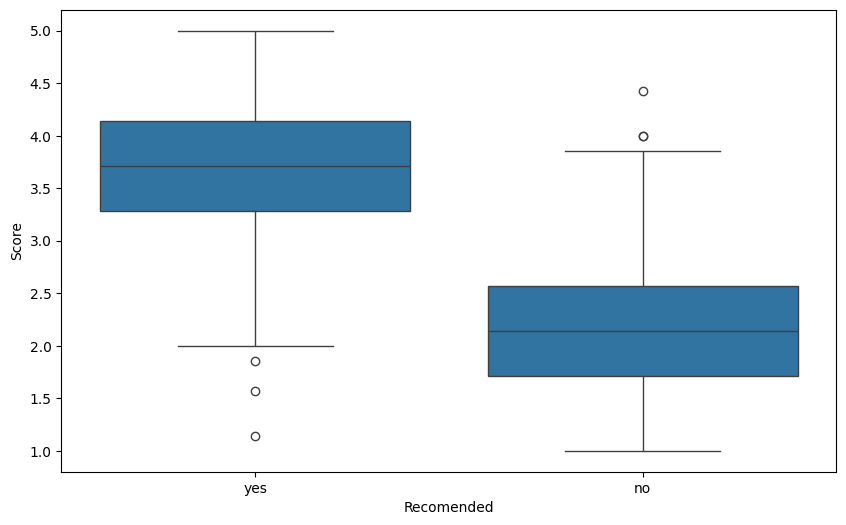

In [71]:
#Again using group dy to group score this time with the answer to the question if passengers recommend to other
recommendScore = df.groupby('Recommended')['Score'].mean().reset_index()
plt.figure(figsize=(10,6))
#creating box plot to see where the bulk of people lies on mean score to recommendation 
sns.boxplot(x='Recommended', y='Score', data=df)
plt.xlabel("Recomended")
plt.ylabel("Score")
plt.show()

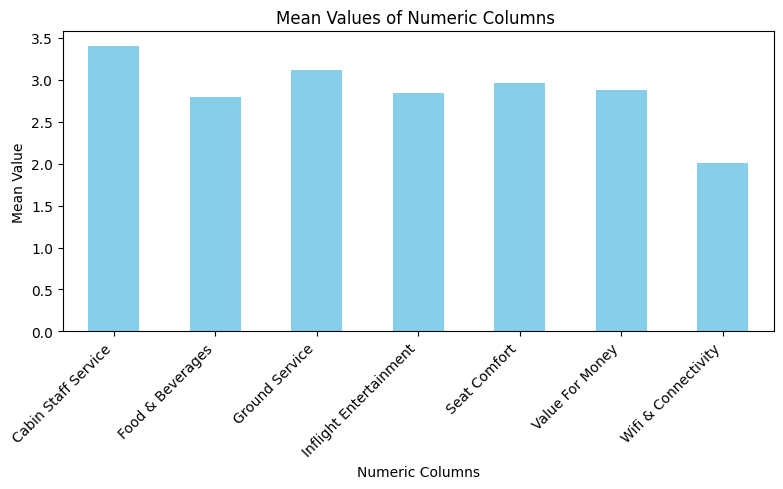

In [15]:
exclude_columns = ['polarity', 'Score']
# Calculate the mean for each numeric column excluding specified columns
numeric_cols = df.select_dtypes(include=["number"]).columns.difference(exclude_columns)
mean_values = df[numeric_cols].mean()
# Plotting
plt.figure(figsize=(8, 5))
mean_values.plot(kind='bar', color='skyblue')
plt.title('Mean Values of Numeric Columns ')
plt.xlabel('Numeric Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Sentiment Analysis 

In [2]:
df=pd.read_csv("data/BA_reviews.csv")

In [5]:
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Add a new column 'sentiment' with labels
df['sentiment'] = df['polarity'].apply(lambda x: get_sentiment_label(x) if x is not None else 'neutral')
df.head()

,Seat Type,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,reviews,Score,polarity,sentiment
0,Business Class,2024-02-01,4,yes,5,5,5,4,3,2,Have no fear when your BA flight is operated...,4.000000,0.550000,positive
1,Economy Class,2024-02-01,1,no,1,5,3,1,3,1,We have flown BA five times from western USA...,2.142857,-0.176282,negative
2,Economy Class,2024-02-01,2,no,3,1,1,2,3,2,London Heathrow to Istanbul at the start of ...,2.000000,0.044923,positive
3,Premium Economy,2024-01-01,2,no,3,5,3,4,3,2,"Jan 30th, I booked a last-minute, transatlant...",3.142857,-0.059213,negative
4,First Class,2023-11-01,1,no,1,4,1,4,3,2,I am a British Airways Gold Guest List member...,2.285714,0.155000,positive


In [38]:
df.sample()

,Seat Type,Date Flown,Value For Money,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,reviews,Score,sentiment
1086,Business Class,2017-03-01,4,yes,4,5,4,4,4,2,"San Diego to London, an excellent flight wit...",3.857143,positive


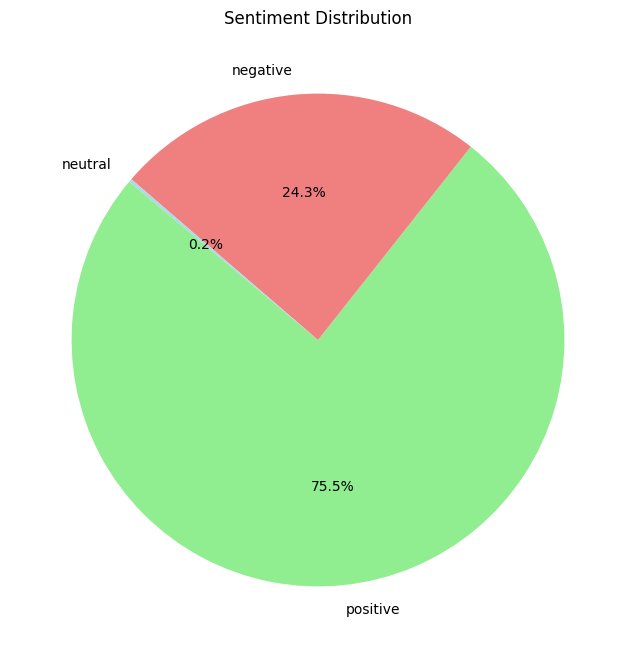

In [41]:
sentiment_counts = df['sentiment'].value_counts()

# Plot a pie chart
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution')
plt.show()

In [6]:
#separating negative reviews to analyse
negative_reviews_df = df[df['sentiment'] == 'negative']

## Word Cloud

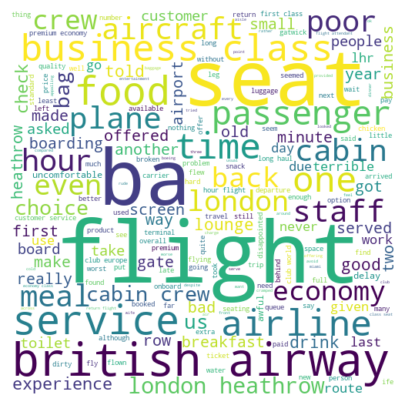

In [8]:
#Analyzing only negative reviews to see what people talked about most in their negative reviews
all_reviews = ' '.join(negative_reviews_df['reviews'].astype(str))

stop_words = set(stopwords.words('english'))

# Tokenize the reviews
words = word_tokenize(all_reviews)

# Remove stop words
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the filtered words into a string
filtered_reviews = ' '.join(filtered_words)

# Create a WordCloud object
wordcloud = WordCloud(width=500, height=500, random_state=21, max_font_size=110, background_color='white').generate(filtered_reviews)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()